In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import multivariate_normal as mvn
from sklearn.decomposition import PCA

# Wine Quality dataset 

In [2]:
#getting the datasets
wine_white=pd.read_csv("Downloads/winequality-white.csv",delimiter=';')
w=np.array(wine_white)
wine_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

Text(0.5, 1.0, 'alcohol')

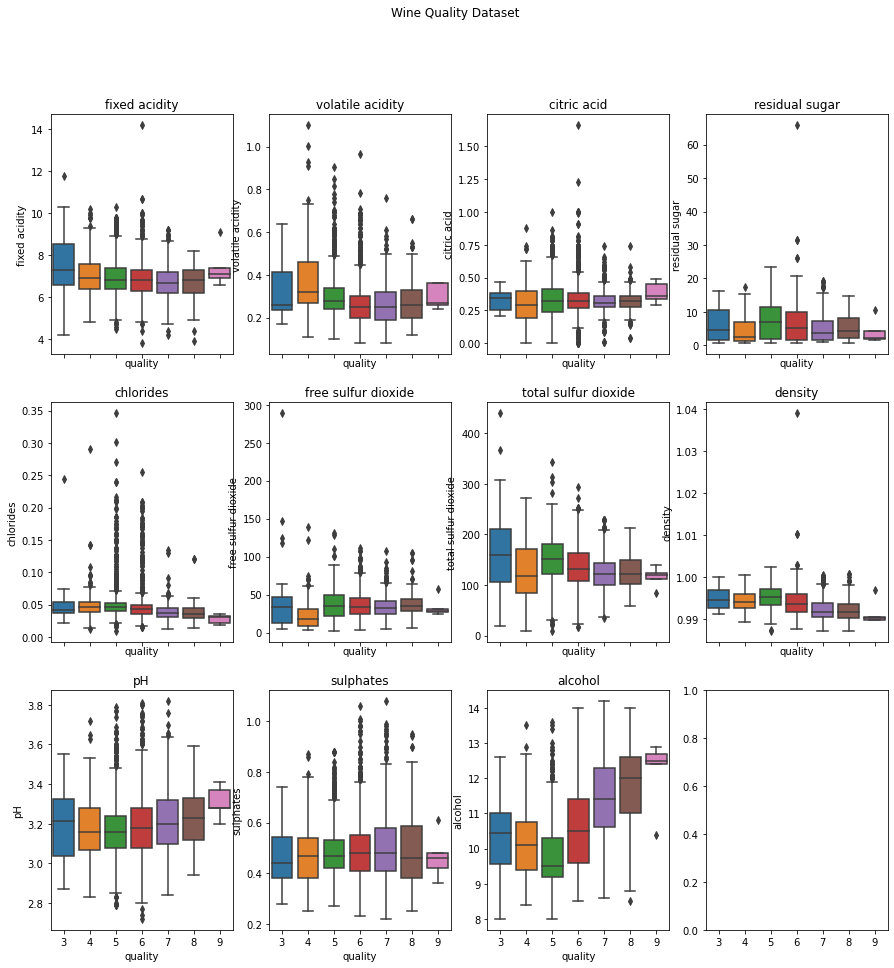

In [3]:
fig, axes = plt.subplots(3,4, sharex= True, figsize=(15,15))
fig.suptitle('Wine Quality Dataset')

sns.boxplot(x='quality', y='fixed acidity' , data= wine_white, ax= axes[0,0])
axes[0,0].set_title('fixed acidity')
sns.boxplot(x='quality', y='volatile acidity' , data= wine_white, ax= axes[0,1])
axes[0,1].set_title('volatile acidity')
sns.boxplot(x='quality', y='citric acid' , data= wine_white, ax= axes[0,2])
axes[0,2].set_title('citric acid')
sns.boxplot(x='quality', y='residual sugar' , data= wine_white, ax= axes[0,3])
axes[0,3].set_title('residual sugar')

sns.boxplot(x='quality', y='chlorides' , data= wine_white, ax= axes[1,0])
axes[1,0].set_title('chlorides')
sns.boxplot(x='quality', y='free sulfur dioxide' , data= wine_white, ax= axes[1,1])
axes[1,1].set_title('free sulfur dioxide')
sns.boxplot(x='quality', y='total sulfur dioxide' , data= wine_white, ax= axes[1,2])
axes[1,2].set_title('total sulfur dioxide')
sns.boxplot(x='quality', y='density' , data= wine_white, ax= axes[1,3])
axes[1,3].set_title('density')

sns.boxplot(x='quality', y='pH' , data= wine_white, ax= axes[2,0])
axes[2,0].set_title('pH')
sns.boxplot(x='quality', y='sulphates' , data= wine_white, ax= axes[2,1])
axes[2,1].set_title('sulphates')
sns.boxplot(x='quality', y='alcohol' , data= wine_white, ax= axes[2,2])
axes[2,2].set_title('alcohol')


In [4]:
#calculate class priors for 0...10 class labels
samples=w.shape[0]
features=w.shape[1]-1  #dimensions and number of class labels are same
priors=np.zeros(features)
N_labels=[]

for i in range(features):
    priors[i]=(sum(wine_white['quality']==i))
    N_labels.append(priors[i])
    priors[i]=round(priors[i]/samples,3)
priors, N_labels
labels=np.array(wine_white["quality"])

In [5]:
#estimate mean vector of 11 features
mean_wine=np.zeros((features,len(N_labels)))
for i in range(len(N_labels)):
    if N_labels[i]==0:
        mean_wine[:,i]=0
    else:
        mean_wine[:,i]=(np.mean(w[:,i]))

#covariance matrix
cov_wine=np.zeros((features,features,len(N_labels)))
for i in range(len(N_labels)):
    if N_labels[i]==0:
        cov_wine[:,:,i]=np.eye(features)*1e-10 #add regularization with the sample covariance to get non-singular pdf
    else:
        cov_wine[:,:,i]=np.cov(w[:,0:11],rowvar=False)+ (1*np.eye(features))

In [6]:
def estimate_risk(X,labels, X_cov,X_mean,priors,loss_matrix): 
    samples=X.shape[0]
    L=X.shape[1]
    px_l=np.zeros((samples,L))
    
    for l in range(L): 
        px_l[:,l] = mvn.pdf(X,X_mean[:,l],X_cov[:,:,l])
        
    px= np.dot((priors).reshape(1,features), px_l.T)
    class_posteriors= px_l *np.array([priors] *samples)  / (px).T  
    Risks= np.dot((loss_matrix) ,class_posteriors.T)
    
    return Risks

In [7]:
loss_matrix =np.ones(features)-np.eye(features)
expectedRisks= estimate_risk(w[:,0:11],labels,cov_wine,mean_wine,priors,loss_matrix)
decision=np.argmin(expectedRisks, axis=0)

In [8]:
def estimate_confusion_matrix(decision,labels,X):
    L=X.shape[1]; D=X.shape[1]
    #L=D=(np.unique(labels))
    ConfusionMatrix=np.zeros((D,L))
    for d in range(D):
        for l in range(L):
            idx=((decision==d) & (labels == l)) 
            #print(X[idx,l])
            if labels[l]==0:
                ConfusionMatrix[d][l]=sum(idx)
            else:
                ConfusionMatrix[d][l]= sum(idx)# / sum((labels == l))
    return ConfusionMatrix

ConfusionMatrix= estimate_confusion_matrix(decision,labels,w[:,0:11])
ConfusionMatrix

array([[   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    5.,   90.,  837.,  978.,  255.,   39.,
           0.,    0.],
       [   0.,    0.,    0.,   15.,   73.,  620., 1220.,  625.,  136.,
           5.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.],
       [   0.,    0.,    0.,    0.,    0.,    0.,    0.,    

In [9]:
accuracy= (sum(np.diag(ConfusionMatrix))/samples)*100
accuracy, 100-accuracy 

(7.982850142915476, 92.01714985708452)

In [10]:
import plotly.express as px

In [11]:
human_xtrain=np.loadtxt("Downloads/HAR/HARDataset/train/X_train.txt")
human_ytrain=np.loadtxt("Downloads/HAR/HARDataset/train/y_train.txt")
human_xtest=np.loadtxt("Downloads/HAR/HARDataset/test/X_test.txt")
human_ytest=np.loadtxt("Downloads/HAR/HARDataset/test/y_test.txt")

In [12]:
#calculate class priors for 1...6 class labels
def estimate_properties(train,test):
    samples=train.shape[0]
    features=train.shape[1]

    labels= np.unique(test)
    priors=np.zeros(len(labels))
    N_labels=[]

    for i in range(len(labels)):
        priors[i]=(sum(test==i+1)) #labels start from 1
        N_labels.append(priors[i])
        priors[i]=round(priors[i]/samples,3)
    
    return priors,N_labels,features,samples,labels

priors_HAR,N_labels_HAR,features_HAR,samples_HAR,labels_HAR= estimate_properties(human_xtrain,human_ytrain)

In [13]:
def compute_mean_cov(X,labels): #use train sample
    features=X.shape[1]
    L=len(np.unique(labels))
    X_mean=np.zeros((features,L))
    X_cov=np.zeros((features,features,L))

    for l in range(L):
        X_mean[:,l]= X[labels==l+1].mean(axis=0)
        X_cov[:,:,l]=np.cov(X[labels==l+1,:],rowvar=False) + (1*np.eye(features))
        
    return X_cov, X_mean

mean_HAR=np.zeros((features_HAR,len(labels_HAR)))
cov_HAR=np.zeros((features_HAR,features_HAR,len(labels_HAR)))

cov_HAR, mean_HAR= compute_mean_cov(human_xtrain,human_ytrain)

In [14]:
priors_HAR

array([0.167, 0.146, 0.134, 0.175, 0.187, 0.191])

In [15]:
def estimate_risk(X,labels, X_cov, X_mean,priors,loss_matrix): 
    samples=X.shape[0]
    L=len(np.unique((labels)))
    px_l=np.zeros((samples,L))
    
    for l in range(L): 
        px_l[:,l] = mvn.pdf(X,X_mean[:,l],X_cov[:,:,l]) #*p[l]
    px= np.dot((priors).reshape(1,L), px_l.T)
    class_posteriors= px_l #*np.array([priors] *samples)  / (px).T  
    Risks= np.matmul((loss_matrix) ,class_posteriors.T)
    
    return Risks

In [16]:
loss_matrix_HAR =np.ones(len(labels_HAR))-np.eye(len(labels_HAR))
expectedRisks_HAR= estimate_risk(human_xtest,human_ytest,cov_HAR,mean_HAR,priors_HAR,loss_matrix_HAR)
decision_HAR=np.argmin(expectedRisks_HAR, axis=0)

In [17]:
def estimate_confusion_matrix(decision,labels,X):
    #L=X.shape[1]; D=X.shape[1]
    L=D=(np.unique(labels))
    ConfusionMatrix=np.zeros((len(D),len(L)))
    for d in range(len(D)):
        for l in range(1,len(L)+1):
            idx=((decision==d) & (labels == l)) 
            ConfusionMatrix[d][l-1]= sum(idx) #/ sum((labels == l))
    return ConfusionMatrix

ConfusionMatrix_HAR= estimate_confusion_matrix(decision_HAR,human_ytest,human_xtest.T)
CMhar=ConfusionMatrix_HAR.T
ConfusionMatrix_HAR.astype(int)

array([[494,  15, 107,   0,   0,   0],
       [  0, 456,  64,   3,   0,   0],
       [  2,   0, 249,   0,   0,   0],
       [  0,   0,   0, 297,   8,   0],
       [  0,   0,   0, 190, 524,   0],
       [  0,   0,   0,   1,   0, 537]])

In [18]:
accuracyhar= (sum(np.diag(ConfusionMatrix_HAR))/samples)*100
accuracyhar, 100-accuracyhar

(52.204981625153124, 47.795018374846876)

In [19]:
FP_har = ConfusionMatrix_HAR.sum(axis=0) - np.diag(ConfusionMatrix_HAR)   #column wise
FN_har = ConfusionMatrix_HAR.sum(axis=1) - np.diag(ConfusionMatrix_HAR)   #row wise
TP_har = np.diag(ConfusionMatrix_HAR)
TN_har = sum(ConfusionMatrix_HAR) - (FP_har + FN_har + TP_har)
accuracy_har= (TN_har + TP_har )/ (FP_har +FN_har +TP_har +TN_har)
accuracy_har

array([0.75      , 0.82590234, 0.58809524, 0.5885947 , 0.62781955,
       0.9981378 ])

In [20]:
pca= PCA(n_components=10)
comp= pca.fit_transform(human_xtrain)

In [21]:
fig=px.scatter_matrix(comp, labels=human_ytrain, dimensions= range(1,7), color= human_ytrain )
fig.update_traces(diagonal_visible=False)
fig.show()

C:\Users\vanshika\anaconda3\lib\site-packages\plotly\express\_core.py:137: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return args["labels"][column]


In [22]:
tpca= PCA(n_components=10)
tcomp= tpca.fit_transform(human_xtest)

tfig=px.scatter_matrix(tcomp, labels=human_ytest, dimensions= range(1,7), color= human_ytest )
tfig.update_traces(diagonal_visible=False)
tfig.show()

C:\Users\vanshika\anaconda3\lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

